# Introduction
* In this project we will use some different models to classification Identification of Weeds.

## Project Pipeline
* Loading the library

* Loading the Image data set

* Data Pre-processsing

* Data Generation
   * Train data generation
   * Validation data generation
   * Test data generation

* Apply deep learning Models
   * EffichentNetB0
   * EffichentNetB3
   * DensNet121
   * VGG16
   * CNN
   * HHO with CNN
   
* Training the Models
* Testing the Models
* Evaluate the models

# Loading the Library

- The code begins by importing various libraries and modules for different tasks in your project. These libraries/modules include:

    - System Libraries:
        - `os`: For interacting with the operating system.
        - `Path`, `glob`: For working with file paths and searching for files.

    - Visualization Libraries:
        - `matplotlib.pyplot` and `matplotlib.cm`: For creating visualizations and working with colormaps.
        - `seaborn`: For enhancing the style of visualizations.

    - Data Handling Libraries:
        - `numpy`: For numerical operations and array manipulation.
        - `pandas`: For working with data in tabular form.
        - `PIL.Image`: For working with images.
        - `time`: For time-related operations.

    - Deep Learning Libraries:
        - `tensorflow` and `keras`: For creating and training neural network models.
        - Various modules from Keras, such as `Sequential`, `Model`, `Dense`, `Dropout`, `Conv2D`, and others.
        - `ImageDataGenerator`: For data augmentation and preprocessing of images.
        - `ReduceLROnPlateau`: For reducing the learning rate during training.
        - `backend` from Keras: For backend operations.
        - `keras.preprocessing.image`: For image preprocessing.
        - Callbacks like `Callback`, `EarlyStopping`, `ModelCheckpoint`.

    - Metrics Libraries:
        - `classification_report`, `confusion_matrix`: For evaluating model performance.
        - `tensorflow.keras.utils.plot_model`: For visualizing model architectures.
        - `tensorflow_addons` (`tfa`): For additional metrics like `F1Score` and `MatthewsCorrelationCoefficient`.
        - Various metrics from `tensorflow.keras` and `tensorflow_addons.metrics`.

Here doctor, this set of imports covers a wide range of functionalities required for building, training, evaluating, and visualizing neural network models for your project.

In [121]:
# For system library
import os
from pathlib import Path
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# For working with the data
import numpy as np
import pandas as pd
import numpy
import time

from PIL import Image
np.random.seed(11)
import itertools

# Using this library for creating the Models
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Input

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
import random
import urllib.request
import matplotlib.image as mpimg
from skimage import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# Metrics to check the performance for the model.
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model


# Reading the Image data

In [122]:
# Get the data from the path
train='/kaggle/input/weeds-detection-dataset/weed_detection_data/train'

### Train image

##### `Explination`

- `train_dir` = Path(train): This line uses the Path class from the pathlib module to create a Path object named train_dir. This object represents the directory path specified by the variable train.

 - `image_extensions` = ['jpg', 'png']: Here, a list named image_extensions is defined. It contains two strings: `jpg` and `png`, which are common file extensions for image files.

- `filepaths_for_train` = [path for ext in image_extensions for path in train_dir.glob(f'**/*.{ext}')]: This is a list comprehension that generates a list of file paths for image files in the specified directory. Let's break it down:

- The outer loop iterates over each file extension (ext) in the image_extensions list.

- The inner loop iterates over each file path (path) returned by the glob function. 

- The `glob` function is used to search for files matching the given pattern within the directory and its subdirectories.

- The pattern used is `**/*.ext, where **/ ` matches all subdirectories and ext is the file extension being considered.

- For each combination of ext and path, a list of matching file paths is created.

- All these lists are combined into a single list using the list comprehension.

- The result is a list of file paths (`filepaths_for_train`) for all image files with the specified extensions in the specified directory and its subdirectories.

`In summary`, this code creates a list of file paths for image files (with extensions 'jpg' and 'png') within a specified directory and its subdirectories.

In [123]:
# Define the directory path where the images are located
train_dir = Path(train)

# List of image file extensions we want to consider
image_extensions = ['jpg', 'png','jpeg']

# Using a list comprehension to generate a list of file paths for images
# The nested loops iterate through the directory and extensioXns to find matching files
filepaths_for_train = [path for ext in image_extensions for path in train_dir.glob(f'**/*.{ext}')]


#### `Explination`

Here explination of the code: 

- Import the `os` module to work with operating system functionalities.

- Use the `map()` function to apply the provided lambda function to each element of the filepaths_for_train list. This function extracts the label from the directory structure of each image file.

- The `lambda` function lambda x: os.path.split(os.path.split(x)[0])[1] does the following:

- `os.path.split(x)` splits the file path into the directory path and the filename.

- `os.path.split(x)[0]` extracts the directory path from the above split.

- `os.path.split(os.path.split(x)[0])[1]` splits the directory path to extract the label directory name, which represents the label of the image.

- he `list() `function is used to convert the map object to a list, resulting in the labels_train list containing the extracted labels for each image file.


In [124]:
# Extracting labels from directory structure for each image file
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_for_train))

##### `Explination`

- `filepaths` = pd.Series(filepaths_for_train, name='Filepath').astype(str): This line converts the filepaths_for_train list, containing image file paths, into a Pandas Series named filepaths. Here's what each part does:

- `pd.Series(filepaths_for_train, name='Filepath'):` Creates a Pandas Series from the filepaths_for_train list. The name parameter is set to 'Filepath' to name the Series.

- `.astype(str):` Converts the values in the Series to strings. This step ensures that all elements in the Series are treated as strings.

- `labels` = pd.Series(labels_train, name='Label'): Similarly, this line converts the labels_train list, containing image labels, into another Pandas Series named labels. The process is the same as for the filepaths Series, but the name of the Series is set to 'Label'.

- `Here doctor in summary, `these lines of code convert the lists of file paths and labels into Pandas Series objects. This can be useful for further data analysis and manipulation using Pandas, as Series provide a convenient way to work with one-dimensional labeled arrays of data.

In [125]:
# Convert the list of file paths to a Pandas Series
filepaths = pd.Series(filepaths_for_train, name='Filepath').astype(str)

# Convert the list of labels to a Pandas Series
labels = pd.Series(labels_train, name='Label')

##### `Explination`

- `image_df` = pd.concat([filepaths, labels], axis=1): This line uses the pd.concat() function to concatenate the filepaths and labels Series objects into a DataFrame named image_df. Here's what each part does:

- `pd.concat([filepaths, labels], axis=1):` The pd.concat() function is used to concatenate data along a specified axis. In this case, axis=1 means that the concatenation is performed horizontally, creating a DataFrame with columns side by side.

- `[filepaths, labels]:` This is a list containing the Series to be concatenated. The filepaths Series will be the first column, and the labels Series will be the second column.

- `image_df.head(5):` This line displays the first 5 rows of the image_df DataFrame. The .head(5) method is used to retrieve the first 5 rows, giving you a preview of the data.

- `In summary, `these lines of code concatenate the filepaths and labels Series into a DataFrame named image_df and then display the first 5 rows of the DataFrame to give you an initial view of the data structure.


In [126]:
# Concatenate the filepaths and labels into a DataFrame
image_df = pd.concat([filepaths, labels], axis=1)

# Display the first 5 rows of the DataFrame
image_df.head(5)

,Filepath,Label
0,/kaggle/input/weeds-detection-dataset/weed_det...,weed
1,/kaggle/input/weeds-detection-dataset/weed_det...,weed
2,/kaggle/input/weeds-detection-dataset/weed_det...,weed
3,/kaggle/input/weeds-detection-dataset/weed_det...,crop
4,/kaggle/input/weeds-detection-dataset/weed_det...,crop


In [127]:
# Check the number of image that we have in the dataframe
image_df['Filepath'].shape

(1547,)

In [128]:
# Check the number for each label that we have in the train data
image_df['Label'].value_counts()

Label
weed    793
crop    754
Name: count, dtype: int64

#### Show some of image that we have in the dataset


##### Explinatin

- `random_index = np.random.randint(0, len(image_df), 16):` This line uses NumPy to generate an array of 16 random indices. These indices will be used to select 16 random images from the dataset for display. The indices range from 0 to the length of the dataset minus 1 (len(image_df)), ensuring that the indices are within the valid range of the dataset.

- `fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []}):` This code creates a 4x4 grid of subplots using Matplotlib. Each subplot will be used to display an image with its label. The figsize parameter specifies the size of the figure, and subplot_kw is used to set properties of each subplot, such as removing the tick marks on the x and y axes.

- `The loop for i, ax in enumerate(axes.flat):` iterates through each subplot in the grid and provides both the index i and the corresponding subplot ax to work with.

- `ax.imshow(plt.imread(image_df.Filepath[random_index[i]])):` This line uses Matplotlib's imshow() function to display the image associated with the i-th random index. plt.imread() is used to read the image from the file path stored in the DataFrame. The image is displayed within the current subplot ax.

- `ax.set_title(image_df.Label[random_index[i]]):` This sets the title of the current subplot to the label associated with the i-th random index from the DataFrame.

- `plt.tight_layout():` This function call adjusts the layout of the subplots to ensure they fit within the figure area without overlapping.

- `plt.show():` Finally, this command displays the complete figure with the 16 images and their labels.

- `In summary,` this code generates a 4x4 grid of subplots, randomly selects 16 images from the dataset, and displays them along with their corresponding labels.


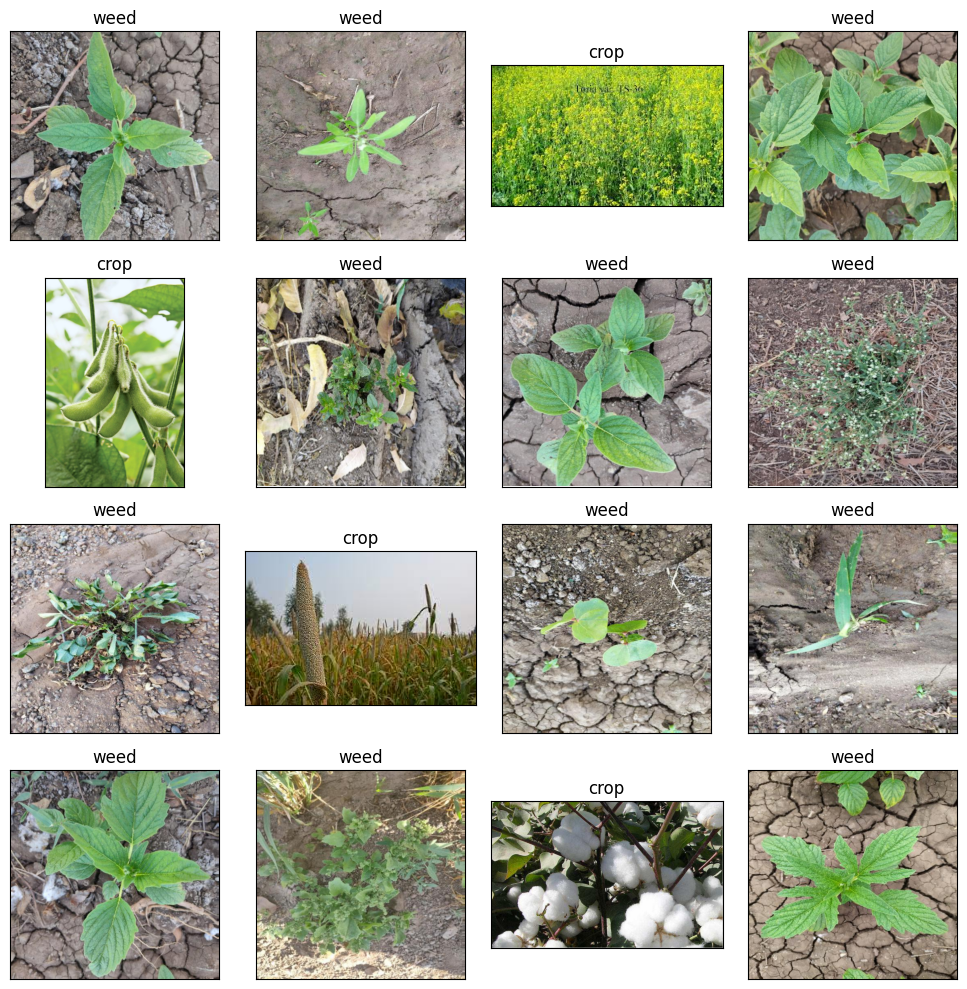

In [129]:
# Generate 16 random indices to select images from the dataset
random_index = np.random.randint(0, len(image_df), 16)

# Create a 4x4 grid of subplots for displaying images
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the grid and display images with their labels
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Spliting the data

##### Explination

- `batch_size = 32:` This line sets the batch_size variable to 32. In the context of training a machine learning model,a batch is a subset of the training data that is processed together in one forward and backward pass.
The batch size defines how many samples are included in each batch. A smaller batch size might lead to more frequent updates of the model's weights but can increase training time due to more frequent gradient calculations. A larger batch size might lead to more stable updates but can require more memory.

- `target_size = (100, 100): ` This line sets the target_size variable as a tuple (100, 100). In the context of image processing, it represents the desired dimensions for resizing images.
 Images in the dataset will be resized to a width of 100 pixels and a height of 100 pixels using these dimensions.
 
 This is often done to ensure that all images have a consistent size before feeding them into a machine learning model.


In [130]:
# Set the batch size for the data
batch_size = 32

# Set the target size for the images
target_size = (100, 100)

####  Using Train test Split to split the data

`train_test_split()` is used to split the data into training and testing subsets

`test_size specifies` the proportion of the dataset to be used for testing (20% in this case)

`shuffle=True `shuffles the data before splitting

`random_state=42` sets a seed for reproducibility

In [131]:
# Separate the data into train and test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)


# Image Data Generation


1. **Training Data Generator**:

   - `preprocessing_function`: This function preprocesses each input image before it's fed into the model. In this case,

    `tf.keras.applications.efficientnet.preprocess_input`  is used, which is a preprocessing function typically used with EfficientNet models.
    
   - `validation_split`: This parameter specifies the fraction of the data to reserve for validation. In this case, 20% of the data is set aside for validation during training.

2. **Test Data Generator**:
 
   - `preprocessing_function`: Similar to the training generator, it preprocesses test data using the same preprocessing function.


These data generators will be used in conjunction with the 
`flow_from_dataframe` method to load and preprocess the data from dataframes, which can then be fed into the model during training and testing. 

The `preprocess_input` function is important for normalizing the pixel values of the images and ensuring they match the preprocessing used when the EfficientNet model was pretrained on ImageNet data.

In [132]:
# Train Image Data Generation
# ImageDataGenerator is used to generate batches of image data with data augmentation
train_generator = ImageDataGenerator(
                                            preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
                                            validation_split=0.2
                                        )

# Test Image Data Generation
# ImageDataGenerator for test data, without data augmentation
test_generator = ImageDataGenerator(
                                            preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
                                        )


### Train data generation

##### `Explanation`:

- `flow_from_dataframe`: This method is used to generate batches of data from a dataframe.

- `dataframe`: It specifies the dataframe that contains the data.

- `x_col`: This is the column in the dataframe that contains the file paths of the images.

- `y_col`: This is the column that contains the labels.

- `target_size`: It sets the desired dimensions for the images ((100, 100)).

- `color_mode`: Specifies the color mode of the images ('rgb' for color images) that mean `R` for read and `G` for Grean and `B` for Blue.

- `class_mode`: It's set to 'categorical' because you are using one-hot encoded labels.

- `batch_size`: Determines the batch size for training. It controls how many images are processed in each training step.

- `shuffle`: Setting this to `True` shuffles the data within each batch, which is beneficial for training to prevent the model from overfitting to the order of the data.

- `seed`: It's set to 42 for reproducibility, so the randomization is consistent across runs.

- `subset`: Specifies that this is the training subset of the data.

Here dr. This code prepares the training data generator for oure models, which we can use it during the training oure models in this project ` ان شاء الله`

In [133]:
# Split the data into three categories: train, validation, and testing

# Using the train_generator to generate batches of training data
train_images = train_generator.flow_from_dataframe(
                                                    dataframe=train_df,
                                                    x_col='Filepath',         # Column containing image file paths
                                                    y_col='Label',            # Column containing labels
                                                    target_size=target_size,  # Desired image dimensions
                                                    color_mode='rgb',         # Color mode of the images ('rgb' for color images)
                                                    class_mode='categorical', # Type of labels ('categorical' for one-hot encoded labels)
                                                    batch_size=batch_size,    # Batch size for training
                                                    shuffle=True,             # Shuffle the data within each batch
                                                    seed=42,                  # Random seed for reproducibility
                                                    subset='training'         # Subset of data (training data in this case)
)


Found 990 validated image filenames belonging to 2 classes.


### Validation data generation

In [134]:
# Validation data

# Using the train_generator to generate batches of validation data
val_images = train_generator.flow_from_dataframe(
                                                    dataframe=train_df,
                                                    x_col='Filepath',         # Column containing image file paths
                                                    y_col='Label',            # Column containing labels
                                                    target_size=target_size,  # Desired image dimensions
                                                    color_mode='rgb',         # Color mode of the images ('rgb' for color images)
                                                    class_mode='categorical', # Type of labels ('categorical' for one-hot encoded labels)
                                                    batch_size=batch_size,    # Batch size for validation
                                                    shuffle=True,             # Shuffle the data within each batch
                                                    seed=42,                  # Random seed for reproducibility
                                                    subset='validation'       # Subset of data (validation data in this case)
                                                )


Found 247 validated image filenames belonging to 2 classes.


In [135]:
# Test data generation

# Using the test_generator to generate batches of test data
test_images = test_generator.flow_from_dataframe(
                                                        dataframe=test_df,
                                                        x_col='Filepath',         # Column containing image file paths
                                                        y_col='Label',            # Column containing labels
                                                        target_size=target_size,  # Desired image dimensions
                                                        color_mode='rgb',         # Color mode of the images ('rgb' for color images)
                                                        class_mode='categorical', # Type of labels ('categorical' for one-hot encoded labels)
                                                        batch_size=batch_size,    # Batch size for testing
                                                        shuffle=False             # No need to shuffle the data within each batch becouse this testing data.
                                                    )


Found 310 validated image filenames belonging to 2 classes.


# Using Deep Learning Models


##### Explination

- `img_height = 100:` This line sets the img_height variable to 100. This value represents the desired height (in pixels) of the images that will be used as input to the model. The images will be resized to this height before being fed into the model for training or evaluation.

- `img_width = 100: `Similarly, this line sets the img_width variable to 100. This value represents the desired width (in pixels) of the images. Like img_height, the images will be resized to this width before being processed by the model.

- `num_class = 3:` This line sets the num_class variable to 3. This value represents the number of classes (or categories) present in the dataset. In a classification task, this number indicates how many different categories the model needs to distinguish between. 


In [136]:
# Set the height of the image
img_height = 100

# Set the width of the image
img_width = 100

# Set the number of classes in the dataset
num_class = 2

## Using EfficientNetB0 as first model

##### Explination

- `pretrained_model:` This variable is assigned the EfficientNetB0 model, which is a pre-trained convolutional neural network (CNN) architecture. EfficientNetB0 is a part of the EfficientNet family of models, which are known for their efficiency and effectiveness in image classification tasks.

- `tf.keras.applications.efficientnet.EfficientNetB0():` This line creates an instance of the EfficientNetB0 model.
 
 **The parameters are as follows:**

- `input_shape=(img_height, img_width, 3):` This specifies the input shape of the images that the model will expect. img_height and img_width are the desired height and width of the images, and 3 indicates the number of color channels (RGB).

- `include_top=False:` Setting this parameter to False means that the fully connected layers at the top of the model (used for classification) will not be included. You'll add your own classification layers later.

- `weights='imagenet': `This specifies that the model should be initialized with pre-trained weights trained on the ImageNet dataset. Using pre-trained weights can help the model learn useful features from images more quickly.

- `pooling='max':` The pooling operation to be used after the convolutional layers. 'max' indicates max pooling.

- `pretrained_model.trainable = False:` This line sets all the layers of the pre-trained EfficientNetB0 model as non-trainable. This is often done in transfer learning to prevent the pre-trained weights from being updated during the initial training stages. Later, you might fine-tune some layers if needed. Setting the layers as non-trainable avoids unintentional overwriting of useful pre-trained features.


In [137]:
# Load the pre-trained EfficientNetB0 model for transfer learning
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
                                                                        input_shape=(img_height, img_width, 3),  # Input shape of the images
                                                                        include_top=False,                       # Exclude the fully connected layers on top
                                                                        weights='imagenet',                      # Load pre-trained weights on ImageNet
                                                                        pooling='max'                            # Use max pooling at the end
)

# Set the pre-trained model's layers as non-trainable
pretrained_model.trainable = False

##### **Explanation**:

- `checkpoint_path`: This variable stores the path where the checkpointed model weights will be saved. we can specify a custom file path. this path we can load the files

- `ModelCheckpoint`: It's a Keras callback that monitors the training process and saves the model at specified checkpoints.

- `save_weights_only=True`: This setting ensures that only the model's weights are saved, not the entire model architecture. This is typically done to save disk space and facilitate model transfer.

- `monitor="val_accuracy"`: This parameter specifies the metric that the callback will monitor to decide when to save a checkpoint. In this case, it monitors the validation accuracy (`val_accuracy`) to save the model when it achieves the best validation accuracy.

- `save_best_only=True`: This setting ensures that only the best model (based on the monitored metric) is saved.

In [138]:
# Create a checkpoint callback for the model
# A checkpoint callback saves the best model weights during training

# Path to save the checkpointed model
checkpoint_path = "Papillede_macolab_classification_model_checkpoint.keras"
"""
# ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
                                        checkpoint_path,              # Path to save the checkpointed model
                                        save_weights_only=True,       # Save only the model weights, not the entire model
                                        monitor="val_accuracy",       # Metric to monitor for saving the best model
                                        save_best_only=True           # Save only the best model based on the monitored metric
)
"""
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs that when the model learning.

early_stopping = EarlyStopping(   monitor = "val_loss",
                                  patience = 5,

                                  restore_best_weights = True)

##### Building the model.

##### **Explination**

- `inputs = pretrained_model.input:` This line sets the inputs variable to the input layer of the pre-trained model (pretrained_model). This is the starting point of your custom classification model.

**Adding custom layers:**

- `x = Dense(128, activation='relu')(pretrained_model.output):` A dense layer with 128 units and ReLU activation is added on top of the pre-trained model's output.

- `x = Dropout(0.45)(x):` A dropout layer is added after the previous dense layer to prevent overfitting. It drops 45% of the inputs during training.

- `x = Dense(256, activation='relu')(x):` Another dense layer with 256 units and ReLU activation is added on top of the previous layer.

- `x = Dropout(0.45)(x):` Another dropout layer is added after the second dense layer, again dropping 45% of the inputs.

- `outputs = Dense(num_class, activation='softmax')(x):` This line sets the outputs variable to the output layer of the custom classification model. It's a dense layer with num_class units, using softmax activation for multi-class classification.

- `model = Model(inputs=inputs, outputs=outputs):` Finally, this line creates the complete classification model by specifying its inputs and outputs. The model now includes the pre-trained base layers and the custom classification layers you added on top. This combined model can be used for training and evaluation.


In [139]:
# Create a custom classification model by adding layers on top of the pre-trained model

# Set the input layer to the input of the pre-trained model
inputs = pretrained_model.input

# Add additional layers on top of the pre-trained model's output
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.45)(x)

# Set the output layer
# This layer has 'num_class' units and uses softmax activation for multi-class classification
outputs = Dense(num_class, activation='sigmoid')(x)

# Create the final classification model by specifying its inputs and outputs
model = Model(inputs=inputs, outputs=outputs)

#### Compile the model

##### **Explination**

- `metrics:` This variable defines a list of evaluation metrics to be used for the model. Each metric is a component of the list:

- `'accuracy':` The accuracy metric measures the proportion of correctly predicted instances among all instances.

- `tf.keras.metrics.Precision(name='precision'):` Precision measures the ratio of true positive predictions to the total predicted positives. It's an important metric in tasks where false positives need to be minimized.

- `tf.keras.metrics.Recall(name='recall'):` Recall (also known as sensitivity) measures the ratio of true positive predictions to the actual positives in the dataset.

- `F1Score(num_classes=num_class, name='f1'):` F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics.

- `MatthewsCorrelationCoefficient(num_classes=num_class, name='mc'):` The Matthews Correlation Coefficient is a metric that takes into account true positives, true negatives, false positives, and false negatives, providing a more balanced measure of classification performance.

- `tf.keras.metrics.TruePositives(name='tp'):` Counts the number of true positive predictions.

- `tf.keras.metrics.TrueNegatives(name='tn'):` Counts the number of true negative predictions.

- `tf.keras.metrics.FalseNegatives(name='fn'):` Counts the number of false negative predictions.

- `tf.keras.metrics.FalsePositives(name='fp'):` Counts the number of false positive predictions.

In [140]:
# Set the evaluation metrics for the model

# Define a list of metrics to be used for model evaluation
metrics = [
                        'accuracy',                                          # Accuracy
                        tf.keras.metrics.Precision(name='precision'),        # Precision
                        tf.keras.metrics.Recall(name='recall'),              # Recall
                        tf.keras.metrics.F1Score( name='f1'),           # F1-score
                        #MatthewsCorrelationCoefficient(num_classes=num_class, name='mc'),  # Matthews Correlation Coefficient
                        tf.keras.metrics.TruePositives(name='tp'),           # True Positives
                        tf.keras.metrics.TrueNegatives(name='tn'),           # True Negatives
                        tf.keras.metrics.FalseNegatives(name='fn'),          # False Negatives
                        tf.keras.metrics.FalsePositives(name='fp')           # False Positives
                    ]

- `model.compile(...):` This line compiles the model. Here's what each parameter does:

- `optimizer=Adam(lr=0.001): `The Adam optimizer is used for training the model. The learning rate is set to 0.001.

- `loss="categorical_crossentropy":` The loss function used for training is categorical cross-entropy, which is suitable for multi-class classification tasks.

- `metrics=metrics:` The list of evaluation metrics defined earlier is provided to the metrics parameter. These metrics will be used to evaluate the model's performance during training and validation.

In [141]:
# Compile the model

model.compile(
    optimizer='adam',                          # Optimizer (Adam with learning rate 0.001)
    loss="binary_crossentropy",                   # Loss function for multi-class classification
    metrics=metrics                                    # List of evaluation metrics
)

#### Fiting the model and start traning it.


1. `train_images`: This is the generator created using `train_generator.flow_from_dataframe()` that generates batches of training data.

2. `validation_data=val_images`: This is the generator created using `train_generator.flow_from_dataframe()` that generates batches of validation data.

3. `epochs=30`: The number of training epochs. An epoch is a complete iteration through the training dataset. The model will be trained for 30 epochs.

4. `callbacks=[early_stopping, checkpoint_callback]`: This parameter provides a list of callbacks to be used during training. In this case, two callbacks are provided:
   - `early_stopping`: This callback monitors a specified metric (e.g., validation loss) and stops training early if the monitored metric doesn't improve for a certain number of epochs.
   - `checkpoint_callback`: This callback saves the model's weights during training based on a specified metric (e.g., validation accuracy). It ensures that the best model weights are saved.

The `model.fit()` function trains the model using the provided training and validation data. The training progress and performance metrics for each epoch will be stored in the `history` variable. This `history` object can be used to analyze the training and validation curves, check for overfitting, and assess the model's performance.

In [142]:
# Train the model

# Fit the model to the training and validation data
history = model.fit(
    train_images,                     # Training data generator
    validation_data=val_images,       # Validation data generator
    epochs=30,                        # Number of epochs
    callbacks=[early_stopping]  # List of callbacks (early stopping and checkpoint)
)



Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7860 - f1: 0.7809 - fn: 92.2188 - fp: 93.4062 - loss: 0.5530 - precision: 0.7704 - recall: 0.7760 - tn: 432.9062 - tp: 434.0938 - val_accuracy: 0.9879 - val_f1: 0.9878 - val_fn: 3.0000 - val_fp: 1.0000 - val_loss: 0.0416 - val_precision: 0.9959 - val_recall: 0.9879 - val_tn: 246.0000 - val_tp: 244.0000
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.9826 - f1: 0.9826 - fn: 11.2188 - fp: 12.8750 - loss: 0.0737 - precision: 0.9737 - recall: 0.9794 - tn: 512.1250 - tp: 513.7812 - val_accuracy: 0.9838 - val_f1: 0.9838 - val_fn: 4.0000 - val_fp: 4.0000 - val_loss: 0.0240 - val_precision: 0.9838 - val_recall: 0.9838 - val_tn: 243.0000 - val_tp: 243.0000
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.9820 - f1: 0.9819 - fn: 11.4062 - fp: 10.4062 - loss: 0.0558 - precision: 0.9789 - recall: 0.9779 - tn: 515.2812 - tp: 514.2812 - val_accuracy: 0.9879 - val_f1: 0.9878 - val_fn: 3.0000 - val_fp: 3.0000 - val

#### Plot the figure for the EfficientNetB0 model

##### **Explination**

- `accuracy and val_accuracy:` These variables extract the accuracy and validation accuracy values from the history object. The 'accuracy' key holds the accuracy values achieved during training, and 'val_accuracy' holds the validation accuracy values achieved during each epoch.

- `loss and val_loss:` Similarly, these variables extract the training loss and validation loss values from the history object. The 'loss' key contains the training loss values, and 'val_loss' contains the validation loss values.

- `epochs:` This variable is a range of epoch numbers used as the x-axis for the plots.

_The code then plots the training accuracy, validation accuracy, training loss, and validation loss over the range of epochs using matplotlib._

`The first plot (plt.plot(...)) `displays the training accuracy (in blue) and validation accuracy (in red) over the epochs. The x-axis represents the number of epochs, and the y-axis represents accuracy values.

`The second plot (plt.plot(...))` displays the training loss (in blue) and validation loss (in red) over the epochs. The x-axis represents the number of epochs, and the y-axis represents loss values.

The resulting plots provide insights into the training process, including how accuracy and loss change over the course of training and validation. that help us doctor to understand whether the model is overfitting, underfitting, or performing well on both training and validation data.


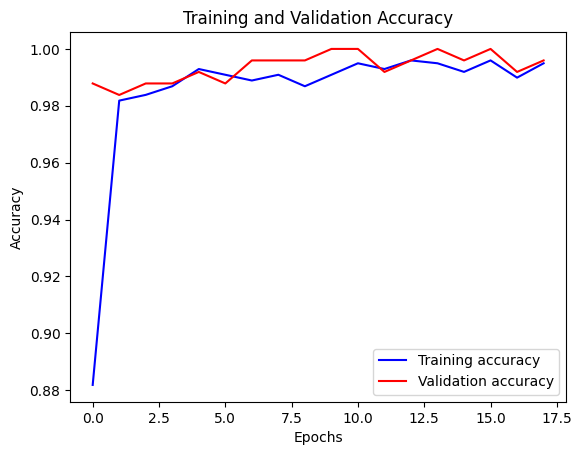

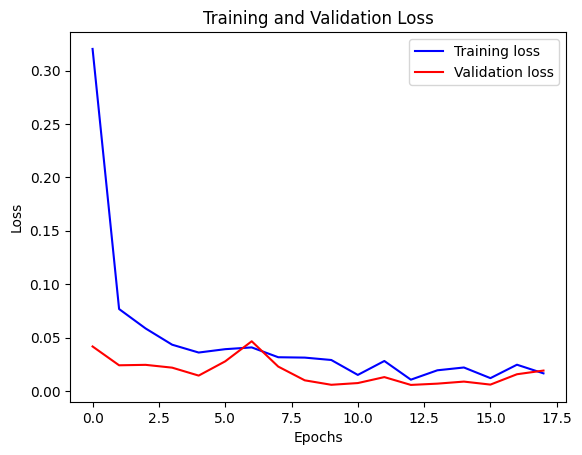

In [146]:
# Plot training and validation metrics over epochs

# Extract accuracy and validation accuracy values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Extract loss and validation loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs for the x-axis of the plots
epochs = range(len(accuracy))

# Plot training and validation accuracy over epochs
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss over epochs
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Predict of the Model


##### **Explination**

`pred = model.predict(test_images):` This line predicts the class probabilities for each image in the test_images using the trained model. The resulting pred array contains a probability distribution across all classes for each image.

`pred = np.argmax(pred, axis=1): `This line finds the index of the class with the highest probability for each image. It converts the probability distribution into a single predicted class index for each image.

`labels = train_images.class_indices:` This line gets the mapping of class labels to their corresponding class indices that was used when generating the training data. It's used to create a dictionary that maps indices back to labels.

`labels = dict((v, k) for k, v in labels.items()):` This line creates a dictionary that maps class indices to class labels. It swaps the keys and values in the labels dictionary.

`pred_y = [labels[k] for k in pred]:` This line maps the predicted class indices back to class labels using the dictionary created in the previous step. It generates a list of predicted labels for each test image.

`print(f'The first 5 predictions: {pred_y[:5]}'):` This line prints the first 5 predicted labels for the test images.

The code essentially predicts the labels for the test images using the trained model, converts the predicted class indices to class labels, and then displays the first 5 predicted labels


In [ ]:
# Predict the labels of the test_images

# Predict the class probabilities for each test image
pred = model.predict(test_images)

# Get the class index with the highest probability for each test image
pred = np.argmax(pred, axis=1)

# Create a mapping of class indices to class labels
labels = train_images.class_indices
labels = dict((v, k) for k, v in labels.items())

# Map the predicted class indices to class labels
pred_y = [labels[k] for k in pred]

# Display the results
print(f'The first 5 predictions: {pred_y[:5]}')

#### Here I work to show the model of prediction by showing some image that model predict it.


##### **Explination**

- `random_index = np.random.randint(0, len(test_df) - 1, 15)`: This line generates an array of 15 random indices within the range of the test dataset length. These indices will be used to randomly select images from the test dataset for display.

- `fig, axes = plt.subplots(...)`: This line creates a figure with a grid of subplots using `plt.subplots()`. The `nrows` and `ncols` parameters determine the number of rows and columns in the grid, and `figsize` specifies the size of the entire figure.

 _The code then iterates through the subplots using a nested loop and displays images along with their true and predicted labels. Each subplot is customized with no x or y ticks._

- Inside the loop:
   - `ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))`: This line displays the image corresponding to the current random index in the subplot.
   - _The code compares the true label with the predicted label for the same image. If they match, the title color is set to green; otherwise, it's set to red._
   - `ax.set_title(...)`: This line sets the title of the subplot to include the true label and the predicted label. The title color reflects whether the prediction was correct or not.

- `plt.show()`: This line displays the subplots with the images and their labels.

- `plt.tight_layout()`: This line adjusts the layout of the subplots to make them fit nicely within the figure. It helps prevent overlapping of titles and labels.


In [ ]:
# Display 15 random images from the dataset along with their true and predicted labels

# Generate random indices for selecting images from the test dataset
random_index = np.random.randint(0, len(test_df) - 1, 15)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15), subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the subplots and display images
for i, ax in enumerate(axes.flat):
    # Display the image from the test dataset
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))

    # Compare the true label with the predicted label for the same image
    if test_df.Label.iloc[random_index[i]] == pred_y[random_index[i]]:
        color = "green"
    else:
        color = "red"

    # Set the title of the subplot
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred_y[random_index[i]]}", color=color)

# Display the subplots
plt.show()
plt.tight_layout()

### Show the Classification Report

- `test_images.classes`: This represents the true class labels for the test images. It is assumed that `test_images` is a generator that yields batches of test data, and `classes` contains the true class labels associated with those test data.

- `pred`: This is an array containing the predicted class labels for the test data. It is assumed that these predictions were made by a classification model.

The `classification_report` function computes and prints various classification metrics for each class in the classification task. The metrics typically included in a classification report are:

- **`Precision`**: The fraction of true positive predictions out of all positive predictions (measures how many of the predicted positive cases were correct).

- **`Recall`**: The fraction of true positive predictions out of all actual positive cases (measures how many of the actual positive cases were correctly predicted).

- **`F1-Score`**: The harmonic mean of precision and recall. It provides a balanced measure of model performance.

- **`Support`**: The number of actual occurrences of each class in the test data.

- **`Accuracy`**: The overall accuracy of the model (the proportion of correctly predicted cases out of all cases).

- **`Macro Average`**: The unweighted average of precision, recall, and F1-score across all classes.

- **`Weighted Average`**: The weighted average of precision, recall, and F1-score, where each class's score is weighted by its support.

This report is useful for understanding how well a classification model is performing on each class and for identifying potential issues such as class imbalance or differences in performance between classes.

In [ ]:
# Show the Classification Report for the model.
print(classification_report(test_images.classes, pred))    # It is take the Class of test image and predict of the models.

#### Plot the Confusion Matrix for the Model.


- `cm` (numpy.ndarray): The confusion matrix to be plotted.

- `classes` (list): A list of class labels, representing the classes for which the confusion matrix is calculated.

- `normalize` (bool, optional): A flag that determines whether to normalize the confusion matrix. If set to `True`, the values in the confusion matrix will be normalized to the range [0, 1]. Default is `True`.

- `title` (str, optional): The title to be displayed on the plot. Default is 'Confusion matrix'.

- `cmap` (matplotlib colormap, optional): The colormap used for displaying the matrix. Default is `plt.cm.Blues`.

Here I use this function to visualize and analyze the performance of a classification model by plotting its confusion matrix.

The confusion matrix provides insights into how well the model is classifying different classes and can help identify misclassifications.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.

    Parameters:
        cm (numpy.ndarray): Confusion matrix.
        classes (list): List of class labels.
        normalize (bool, optional): Whether to normalize the matrix. Default is True.
        title (str, optional): Title of the plot. Default is 'Confusion matrix'.
        cmap (matplotlib colormap, optional): Colormap for the plot. Default is plt.cm.Blues.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')


In [ ]:
# Compute the confusion matrix
cnf_matrix = confusion_matrix(test_images.classes, pred)
np.set_printoptions(precision=2)

# Plot the normalized confusion matrix
plt.figure(figsize=(15, 10))   # Set the figure size to (15, 10) for better visualization
plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Papiliedema', 'Pseudopapilledema'],
                      normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()


In [ ]:
lr=.001 # start with this learning rate
from tensorflow.keras.optimizers import Adam, Adamax
model2.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=metrics)

# Using DensNet121

I created this code ( convolutional neural network (CNN) model using the DenseNet121 architecture from TensorFlow's pre-trained models.)

1. **DenseNet121 Model**: It creates a DenseNet121 model with the following configurations:

   - `weights="imagenet"`: Initializes the model with pre-trained weights from ImageNet, which is a large-scale image database.
   - `include_top=False`: Excludes the final fully connected layers, as these will be customized for the specific classification task.
   - `input_shape=(100, 100, 3)`: Specifies the input shape for the images as 100x100 pixels with 3 color channels (RGB).

In [ ]:
from tensorflow.keras.applications import DenseNet121

# Create a DenseNet121 model
dense = DenseNet121(
                        weights="imagenet",   # Initialize with pre-trained ImageNet weights
                        include_top=False,    # Exclude the final fully connected layers
                        input_shape=(100, 100, 3)  # Shape of input images
                    )


In the code snippet you provided, it sets the `trainable` property of the layers in the DenseNet121 model to `False` for the first 121 layers. This means that the weights of these layers will not be updated during training, effectively freezing them.

1. `dense.layers`: This is a list of all the layers in the DenseNet121 model.

2. `dense.layers[:121]`: It slices the list of layers up to the 121st layer, which corresponds to the layers before the final classification layers.

3. `layer.trainable = False`: For each layer in the sliced list, it sets the `trainable` property to `False`, preventing these layers from being updated during the training process.


In [ ]:
for layer in dense.layers[:121]:
    layer.trainable = False

#### Tunnig the model

This code creates a sequential neural network model using TensorFlow/Keras, where the DenseNet121 model is used as a feature extractor, and additional layers are added on top for classification.

1. **`Sequential Model`**: It initializes a sequential model, which allows you to add layers sequentially.

2. **`Add DenseNet121 as a Layer`**: The `dense` model (DenseNet121) is added as a layer to the sequential model. This means that the output of the DenseNet121 model will be treated as the input to the subsequent layers in your custom model.

3. **`MaxPooling2D Layer`**: A MaxPooling2D layer is added to reduce the spatial dimensions of the feature maps.

4. **`BatchNormalization Layer`**: A BatchNormalization layer is added. Batch normalization is a technique that helps stabilize training by normalizing the activations of the previous layer.

5. **`Dropout Layer`**: A Dropout layer with a dropout rate of 0.3 is added. Dropout is used to reduce overfitting by randomly dropping a fraction of the connections during training.

6. **`Flatten Layer`**: The output is flattened to transform the 2D feature maps into a 1D vector.

7. **`Dense Layer (Fully Connected)`**: A Dense layer with 512 units and ReLU activation is added. This layer is often used to create non-linear combinations of the extracted features.

8. **`Dropout Layer`**: Another Dropout layer with a dropout rate of 0.5 is added.

9. **`Final Output Layer`**: The final output layer with 3 units and softmax activation is added. This is suitable for multi-class classification tasks with three classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the DenseNet121 model as a layer
model.add(dense)

# Add a MaxPooling2D layer
model.add(MaxPooling2D())

# Add a BatchNormalization layer
model.add(BatchNormalization())

# Add a Dropout layer
model.add(Dropout(0.3))

# Flatten the output
model.add(Flatten())

# Add a Dense layer with 512 units and ReLU activation
model.add(Dense(512, activation="relu"))

# Add a Dropout layer
model.add(Dropout(0.5))

# Add the final output layer with 3 units and softmax activation
model.add(Dense(3, activation="softmax"))


In [ ]:
# The model.summary() function provides a summary of the architecture of your Keras model, including details about the layers, output shapes, and the number of trainable parameters. 
model.summary()

In [ ]:
# Compile the model 
lr=0.001
model.compile(optimizer = Adam(lr = 0.001), loss = "categorical_crossentropy", metrics = metrics)

In [ ]:
patience = 1
stop_patience = 3
factor = 0.5
#    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1),
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("densenet121.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)
]

In [ ]:
history = model.fit(
                        train_images,                 # Train image
                        steps_per_epoch=15,           # Test image.
                        validation_data=val_images,   # That is the validation data
                        epochs=67,                    # That is the number of epoch that the model will start train form it.

)

In [ ]:
# Run this cell to plot accuracy vs epoch and loss vs epoch

plt.figure(figsize=(15,5))
plt.subplot(121)
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    try:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
    except KeyError:
        plt.plot(history.history['categorical_accuracy'])
        plt.plot(history.history['val_categorical_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Here I work on maping the labels
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_label = [labels[k] for k in pred]

# Display the result that will achive it form the model.
print(f'The first 5 predictions: {pred[:5]}')

In [ ]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred_label[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred_label[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [ ]:
print(classification_report(test_images.classes, pred))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_images.classes, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15, 10))
plot_confusion_matrix(cnf_matrix, classes=['Normal','Papiliedema','Pseudopapilledema' ],normalize=True,
                      title='Normalized Confusion Matrix')
plt.show()

# Using CNN

##### **Explanation**:

Here, This code  I work to builds a CNN with multiple convolutional, pooling, normalization, and fully connected layers form scratch:

`Convolutional layers:` These layers apply convolutional filters to learn features from the input images. Each Conv2D layer is followed by BatchNormalization for normalization and ReLU activation for introducing non-linearity.

`MaxPooling2D layers: `These layers perform max pooling to reduce the spatial dimensions of the data.

`Dropout layers:` These layers help prevent overfitting by randomly dropping a fraction of input units.

`Flatten layer: `This layer flattens the output from convolutional and pooling layers into a 1D array.

`Dense layers:` These fully connected layers process the flattened data and generate the final classification output.

The code follows a pattern of stacking Conv2D, BatchNormalization, MaxPool2D, and Dropout layers to create hierarchical feature extraction and representation. The final output layer uses softmax activation for multi-class classification.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters, kernel size (3,3), and ReLU activation
model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(100, 100, 3)))

# Add BatchNormalization layer
model.add(BatchNormalization())

# Add a MaxPool2D layer with pool size (2,2) and strides 2
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

# Add another Conv2D layer with 64 filters, kernel size (3,3), and ReLU activation
model.add(Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))

# Add a Dropout layer with dropout rate 0.1
model.add(Dropout(0.1))

# Add BatchNormalization layer
model.add(BatchNormalization())

# Add a MaxPool2D layer
model.add(MaxPool2D((2, 2), strides=2, padding='same'))

# ... Repeat similar blocks for additional Conv2D, BatchNormalization, MaxPool2D, and Dropout layers ...

# Add a Flatten layer to convert the output to 1D
model.add(Flatten())

# Add a Dense layer with 128 units and ReLU activation
model.add(Dense(units=128, activation='relu'))

# Add a Dropout layer with dropout rate 0.2
model.add(Dropout(0.2))

# Add a Dense output layer with 3 units and softmax activation for multi-class classification
model.add(Dense(units=3, activation='softmax'))

### Compile the model

In [ ]:
model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics =metrics)

In [ ]:
model.summary() # summary of the model

In [ ]:
from keras.callbacks import ReduceLROnPlateau

# Create a learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(
                                                    monitor='val_accuracy',  # Metric to monitor for learning rate reduction
                                                    patience=2,               # Number of epochs with no improvement after which learning rate will be reduced
                                                    verbose=1,                # Verbosity mode
                                                    factor=0.3,               # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                                                    min_lr=0.000001           # Lower bound for the learning rate
)

In [ ]:
history = model.fit(
                        train_images,                 # Train image
                        steps_per_epoch=15,           # Test image.
                        validation_data=val_images,   # That is the validation data
                        epochs=67,                    # That is the number of epoch that the model will start train form it.

)

## Using HHO with CNN model
* Here we work to use the CNN model with HHO optimaiztion

The `fitness_function` you provided seems to be used for a hyperparameter optimization algorithm, specifically for the HHO (Harris Hawks Optimization) algorithm. This function is used to evaluate the fitness (or objective) of a set of hyperparameters for a convolutional neural network (CNN) model. 

**Let's break down what this function does:**

1. **Input Parameters (params)**: This function takes a set of hyperparameters as input, presumably defined elsewhere in your code.

2. **Model Training**: Inside the function, it trains a CNN model (`model`) using the specified hyperparameters. It trains the model for 2 epochs (`epochs=2`) using the training data (`train_images`) and evaluates it using the validation data (`val_images`). The `ModelCheckpoint` callback is used to save the best model based on validation accuracy.

3. **Fitness Metric**: The fitness of the model is evaluated based on the maximum validation accuracy achieved during training. It uses `np.max(history.history['val_accuracy'])` to extract the highest validation accuracy from the training history.

4. **Return Value**: The function returns the maximum validation accuracy as the fitness value for the given set of hyperparameters.

This fitness function can be used in conjunction with the HHO algorithm to search for optimal hyperparameters for your CNN model. The HHO algorithm iteratively explores different sets of hyperparameters, evaluates the fitness of each set using this function, and adjusts the search space to find the best hyperparameters for your specific task.

In [ ]:
# Here I work on applying the fitness function for the hho
def fitness_function(params):
    # This is the history for the CNN model.
    history = model.fit(
                        train_images,                 # Train image
                        steps_per_epoch=15,           # Test image.
                        validation_data=val_images,   # That is the validation data
                        epochs=2,                    # That is the number of epoch that the model will start train form it.
                        # Number of Epochs that the moderl will train by it.
                        callbacks=[ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)]) # That is the callbacks for the model.


    # Here I will return the model accuracy, for testing becouse here I give it validation accuracy.
    return np.max(history.history['val_accuracy'])

The code you provided appears to be an implementation of the Harris Hawks Optimization (HHO) algorithm for solving optimization problems. The HHO algorithm is inspired by the hunting behavior of Harris' hawks and is used to find optimal solutions to optimization problems.

Here's a breakdoExplination  of the code:

1. **`solution` Class**: This class is used to store information about the optimization process. It has attributes to store the best solution found, convergence data, optimizer name, objective function name, execution time, and other parameters.

2. **`HHO` Function**: This is the main implementation of the HHO algorithm. It takes the following parameters:
   - `objf`: The objective function to be optimized.
   - `lb` and `ub`: The lower and upper bounds for the search space.
   - `dim`: The dimensionality of the search space.
   - `SearchAgents_no`: The number of search agents or hawks.
   - `Max_iter`: The maximum number of iterations.

  **Within the function:**

   - Initialize the location and energy of the rabbit (the best solution found so far).
   - Initialize the locations of Harris' hawks (search agents).
   - Use a loop to perform the main optimization process for a maximum of `Max_iter` iterations.
   - Calculate the fitness of each solution (position of a hawk).
   - Update the best solution if a better one is found.
   - Update the rabbit location if a hawk finds a better solution.
   - Harris' hawks update their locations based on fitness.
   - The convergence data is recorded for plotting.
   - Display results every 100 iterations.
   - Finally, the best solution and fitness value are printed.

3. **Main Execution**: The code appears to be set up for running the HHO algorithm on a specific objective function. The results, including the best solution and fitness value, are displayed.

This code can be used for solving optimization problems by defining an objective function that you want to optimize. The HHO algorithm will search for the optimal solution within the specified search space boundaries.

In [ ]:
# Here this is the class soluation for the modelthat will train the model
class solution:

    # The initialize function for HHO
    def __init__(self):

        # The instance parameters
        # All the required values initialized
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=1
        self.dim=2
        self.popnum=10
        self.maxiers=0


def HHO(objf, lb, ub, dim, SearchAgents_no, Max_iter):

    # initialize the location and Energy of the rabbit
    Rabbit_Location = numpy.zeros(dim)
    Rabbit_Energy = float("-inf")  # change this to inf for minimize problems

    # Initialize the locations of Harris' hawks
    X = numpy.random.uniform(0, 1, (SearchAgents_no, dim)) * (ub - lb) + lb

    # Initialize convergence
    convergence_curve = numpy.zeros(Max_iter)

    s = solution()

    print("HHO is now tackling \"" + objf.__name__ + "\"")

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")


    t = 0  # Loop counter

    # Main loop
    while t < Max_iter:
        # fitness for each solution
        fitness = numpy.zeros(SearchAgents_no)

        # calculate the fitness of each solution
        for i in range(0, SearchAgents_no):
            fitness[i] = objf(X[i, :])

            # update the best solution
            if fitness[i] > s.best:
                s.best = fitness[i]
                s.bestIndividual = X[i, :].copy()

            # update the rabbit location
            if fitness[i] < Rabbit_Energy:
                Rabbit_Energy = fitness[i]
                Rabbit_Location = X[i, :].copy()

        # a loop for Harris' hawks
        for i in range(0, SearchAgents_no):
            # Harris' hawks update their locations
            if fitness[i] < numpy.mean(fitness):
                for j in range(0, dim):
                    rand = numpy.random.random()
                    X[i, j] = X[i, j] + rand * (Rabbit_Location[j] - rand * X[i, j])

            else:
                # Harris' hawks attempt to catch a rabbit
                for j in range(0, dim):
                    X[i, j] = (
                        s.bestIndividual[j]
                        - fitness[i] * (s.bestIndividual[j] - X[i, j])
                        + numpy.random.random() * (Rabbit_Location[j] - X[i, j])
                    )

        convergence_curve[t] = s.best
        # Display results every 100 iterations
        if t % 100 == 0:
            print(
                ["At iteration " + str(t) + " the best fitness is " + str(s.best)]
            )

        t = t + 1

    timerEnd = time.time()
    s.executionTime = timerEnd - timerStart
    s.convergence = convergence_curve
    s.optimizer = "HHO"
    s.objfname = objf.__name__

    print(
        "The best solution obtained by " + s.optimizer + " is: " + str(s.bestIndividual)
    )
    print(
        "The best fitness value of the objective function found by "
        + s.optimizer
        + " is:"
    )
    print(s.best)

    return s

### Start trainig the model.


- `lb`: The lower bound of the search space. This sets the minimum value that any parameter in the optimization problem can take.

- `ub`: The upper bound of the search space. This sets the maximum value that any parameter in the optimization problem can take.

- `dim`: The dimensionality of the search space. It represents the number of parameters or variables in the optimization problem.

- `SearchAgents_no`: The number of search agents or hawks. These are the entities that will explore the search space to find the optimal solution.

- `Max_iter`: The maximum number of iterations or generations that the algorithm will run.

- `fitness_function`: This is the objective function that you want to optimize. It takes a set of parameters (in this case, a solution represented as a vector) and returns a fitness value that the algorithm aims to maximize. You should replace this with your actual objective function that you want to optimize.

The `HHO` function is then called with these parameters to perform the optimization. The results, including the best solution and fitness value, will be stored in the `solution` object.

In [ ]:
# Set the search space bounds and dimension
lb = 0
ub = 1
dim = 10

# Set the number of search agents and maximum number of iterations
SearchAgents_no = 3
Max_iter = 4

# Call the HHO function
solution = HHO(fitness_function, lb, ub, dim, SearchAgents_no, Max_iter)

In [ ]:
# Here I load the model agin to use it for make prediction and check the performance for it.
model3 = load_model('/content/best_model.h5')

In [ ]:
# Check the summary for the model to show if the structure of the model still the same or not.
model3.summary()

#### Evaluate the model

In [ ]:
# Here check the model evalation
model3.evaluate(test_images)

### Here check the model prediction

In [ ]:
# Predict the label of the test_images
pred = model3.predict(test_images)
pred2 = np.argmax(pred,axis=1)

# I work on maping the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_label2 = [labels[k] for k in pred2]

#### Show iamge that model pridict it.

In [ ]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred_label2[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred_label2[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

#### Classification Report

In [ ]:
# Check the classification report for the model.
print(classification_report(test_images.classes, pred2))

### Plot the confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_images.classes, pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix,classes=['Nprmal',' Papilledema','Pseudopapilledema'],

                      title='Normalized Confusion Matrix')
plt.show()